In [11]:
import pandas as pd
import numpy as np

In [12]:
data = pd.read_csv('food.csv')
data = data.replace(-1.0,10)
data

,category,food_name,쌀,멥쌀,논벼,백미 국내산,일반형,일품,감자,생것,...,달걀 노른자,들깨가루,잔멸치,김,건포도,검은콩가루,calorie,carbohydrate,protein,fat
0,초기 이유식,감자 미음,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40.299999,8.800,0.900,0.0000
1,후기 이유식,밥 새우 애호박 새송이 버섯 양파 죽,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,107.000000,21.450,2.980,0.0000
2,후기 이유식,양송이 버섯 감자 수프,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,68.800003,10.000,3.100,2.0000
3,중기 이유식,닭고기 청경채 당근 죽,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,143.600000,8.825,6.125,2.0000
4,중기 이유식,닭고기 양파 시금치 죽,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,144.350000,9.970,6.450,2.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,후기 이유식,소고기 가지 들깨,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.6,0.0,0.0,0.0,0.0,83.900000,7.750,5.850,3.2350
232,후기 이유식,김 당근 양파,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,2.5,0.0,0.0,67.500000,11.795,3.145,0.4050
233,후기 이유식,건포도 양배추 치즈,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.5,0.0,46.900000,8.315,0.910,0.1325
234,중기 이유식,소고기 아스파라거스 케일 죽,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,32.500000,4.850,1.625,0.1950


In [13]:
ingredient = data.iloc[:,2:-4]
ingredient = ingredient.applymap(lambda x:1 if x != 0 else 0)
context = data.iloc[:,:2]
existdata = pd.concat([context,ingredient],axis=1)

In [335]:
nutrients = data['carbohydrate']
nutrients = np.array(nutrients)

exist = ['양파','생과','두부','국내산','가슴살','배추','아기치즈','우엉','요구르트','호상','소고기']
ingredient_exist = existdata[exist] #14

gram = ['요구르트','호상','당근','명태','바나나','애호박','쌀','비트','연근','재래종','흑미','완두콩','청경채 중국채소','가슴살','미역','치즈','가공치즈','오이','한우','컬리플라워','가지']
ingredient_gram = data[gram] #19

inputs = [nutrients, ingredient_exist, ingredient_gram]

In [329]:
len(exist)

11

In [330]:
len(gram)

21

In [17]:
category = data['category']

def map_category(value):
    if value == '초기 이유식':
        return 0
    elif value == '중기 이유식':
        return 1
    elif value == '후기 이유식':
        return 2
    elif value == '이유기 간식':
        return 3
    else:
        return -1
    
categorymap = np.array(list(map(map_category, category)))

In [266]:
import numpy as np
from tensorflow import keras
from keras.layers import Input, Dense, concatenate, Dropout
from keras.models import Model, load_model
from keras.activations import relu, sigmoid, softmax
from keras.optimizers import Adam
from keras.optimizers import Adadelta, Adagrad
from keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from keras.metrics import sparse_categorical_accuracy, binary_accuracy
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score

In [267]:
from matplotlib import pyplot as plt

def showHistory(history):
    
    fig, (loss, accuracy) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    loss.plot(history.epoch, history.history["loss"], label="train")
    loss.plot(history.epoch, history.history["val_loss"], label = "val")
    loss.legend()
    loss.set_title("Loss")
    
    accuracy.plot(history.epoch, history.history["sparse_categorical_accuracy"], label="train")
    accuracy.plot(history.epoch, history.history["val_sparse_categorical_accuracy"], label="val")
    accuracy.legend()
    accuracy.set_title("Accuracy")
    
    plt.xlim(history.epoch[0], history.epoch[-1])
    plt.tight_layout()  # 그래프들을 더 가독성있게 배치
    plt.show()  # 그래프 출력

In [268]:
from sklearn.model_selection import train_test_split

train_nutrients, test_nutrients, train_gram, test_gram, train_exist, test_exist, train_categorymap, test_categorymap = train_test_split(inputs[0], inputs[1], inputs[2], categorymap)
train_input = [train_nutrients, train_gram, train_exist]
test_input = [test_nutrients, test_gram, test_exist]
train_target = train_categorymap
test_target = test_categorymap

Model: "model_80"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_244 (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 dense_1086 (Dense)             (None, 16)           32          ['input_244[0][0]']              
                                                                                                  
 dense_1087 (Dense)             (None, 32)           544         ['dense_1086[0][0]']             
                                                                                                  
 input_246 (InputLayer)         [(None, 19)]         0           []                               
                                                                                           

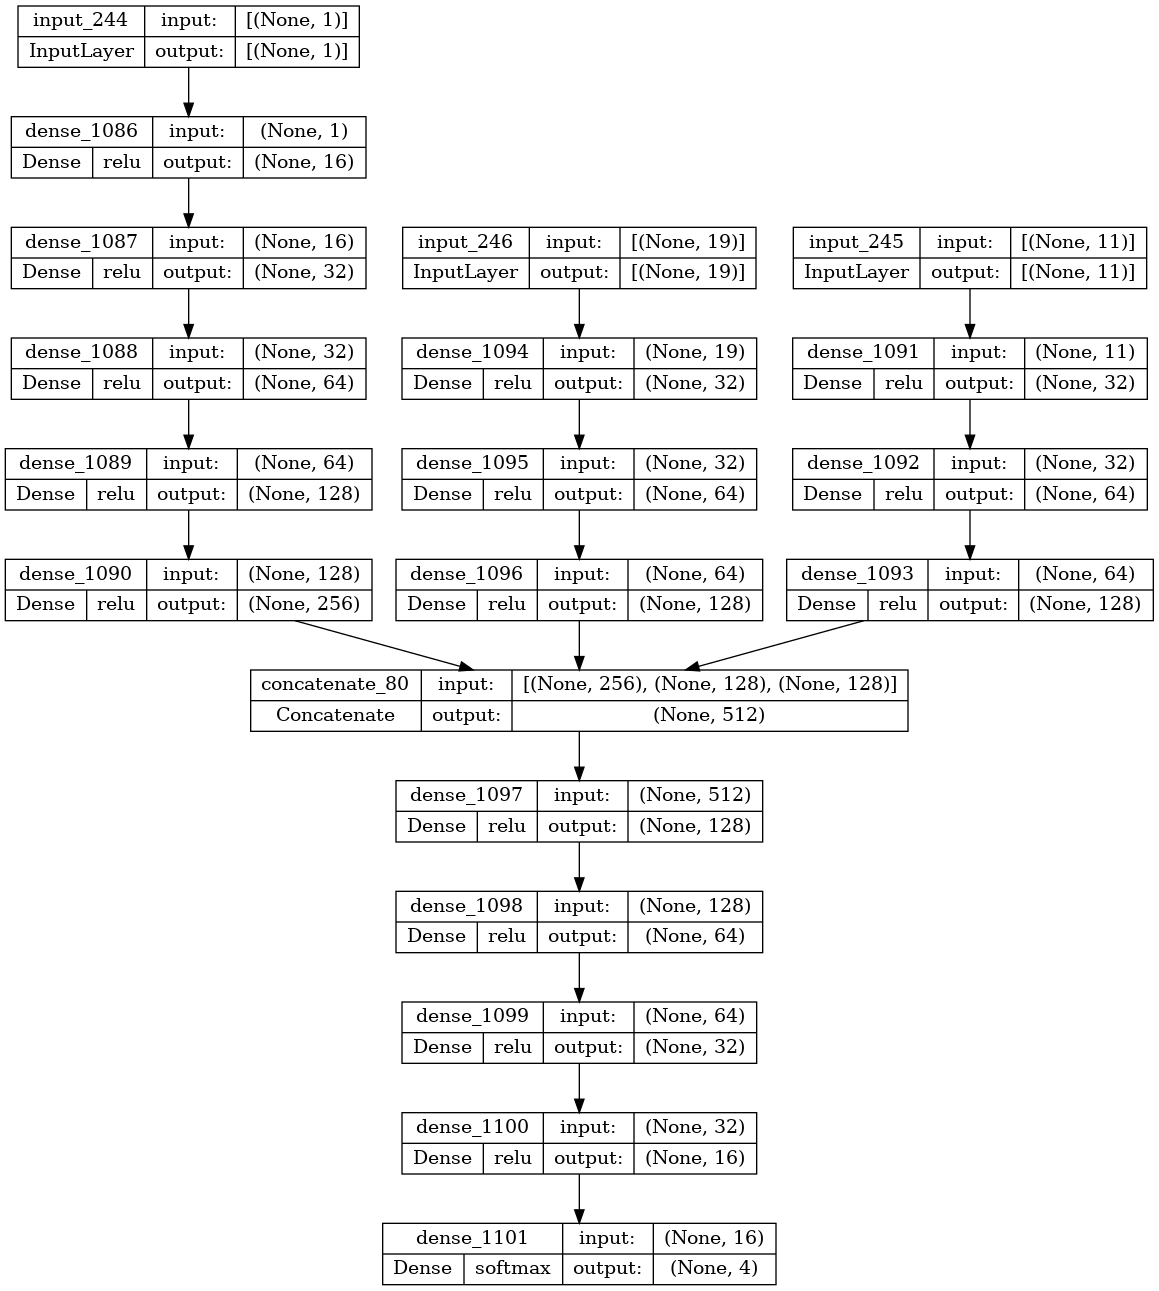

In [331]:
from keras.regularizers import l2

nutrients_input = Input(shape=(1, ))
nutrients_dense1 = Dense(16, activation=relu)(nutrients_input)
nutrients_dense2 = Dense(32, activation=relu)(nutrients_dense1)
nutrients_dense3 = Dense(64, activation=relu)(nutrients_dense2)
nutrients_dense4 = Dense(128, activation=relu)(nutrients_dense3)
nutrients_dense5 = Dense(256, activation=relu, kernel_regularizer=l2(0.01))(nutrients_dense4)


ingredient_exist_input = Input(shape=(11, ))
ingredient_exist_dense1 = Dense(32, activation=relu)(ingredient_exist_input)
ingredient_exist_dense2 = Dense(64, activation=relu)(ingredient_exist_dense1)
ingredient_exist_dense3 = Dense(128, activation=relu, kernel_regularizer=l2(0.01))(ingredient_exist_dense2)

ingredient_gram_input = Input(shape=(19, ))
ingredient_gram_dense1 = Dense(32, activation=relu)(ingredient_gram_input)
ingredient_gram_dense2 = Dense(64, activation=relu)(ingredient_gram_dense1)
ingredient_gram_dense3 = Dense(128, activation=relu, kernel_regularizer=l2(0.01))(ingredient_gram_dense2)


merge = concatenate([nutrients_dense5, ingredient_gram_dense3, ingredient_exist_dense3])
merge_dense1 = Dense(128, activation=relu, kernel_regularizer=l2(0.01))(merge)
merge_dense2 = Dense(64, activation=relu)(merge_dense1)
#merge_dropout1 = Dropout(0.5)(merge_dense1)
merge_dense3 = Dense(32, activation=relu, kernel_regularizer=l2(0.01))(merge_dense2)
#merge_dropout3 = Dropout(0.5)(merge_dense2)
merge_dense4 = Dense(16, activation=relu, kernel_regularizer=l2(0.01))(merge_dense3)
output = Dense(4, activation=softmax)(merge_dense4)

model = Model(inputs = [nutrients_input, ingredient_exist_input, ingredient_gram_input], outputs = output)
model.compile(optimizer=Adam(learning_rate=0.001), loss=sparse_categorical_crossentropy, metrics=[sparse_categorical_accuracy])

model.summary()
plot_model(model, show_layer_activations=True, show_shapes=True)

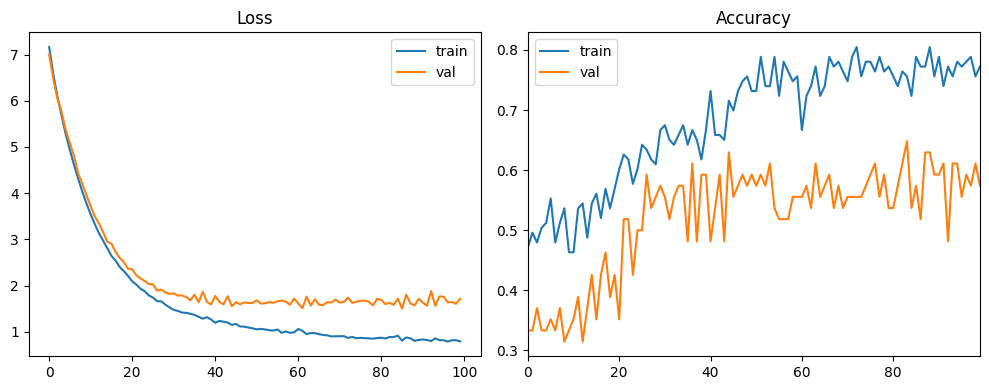

In [332]:
history = model.fit(train_input, train_target, validation_split=0.3, epochs=100, verbose=0)
showHistory(history)

In [333]:
model.evaluate(test_input,test_target)

2/2 [==============================] - 0s 4ms/step - loss: 2.0330 - sparse_categorical_accuracy: 0.5593


[2.032954692840576, 0.5593220591545105]

In [334]:
from sklearn.metrics import confusion_matrix

prediction = model.predict(test_input)
prediction = np.argmax(prediction,axis=1)
confusion = confusion_matrix(test_target,prediction)
confusion

2/2 [==============================] - 0s 2ms/step


array([[ 2,  4,  5,  0],
       [ 0, 12, 11,  1],
       [ 0,  2, 18,  0],
       [ 0,  1,  2,  1]])

In [16]:
from sklearn.model_selection import train_test_split

train_nutrients, test_nutrients, train_gram, test_gram, train_exist, test_exist, train_categorymap, test_categorymap = train_test_split(inputs[0], inputs[1], inputs[2], categorymap)
train_input = [train_nutrients, train_gram, train_exist]
test_input = [test_nutrients, test_gram, test_exist]
train_target = train_categorymap
test_target = test_categorymap

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 nutrient_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 nutrient_dense_1 (Dense)       (None, 16)           32          ['nutrient_input[0][0]']         
                                                                                                  
 ingredient_exist_input (InputL  [(None, 11)]        0           []                               
 ayer)                                                                                            
                                                                                                  
 nutrient_dense_2 (Dense)       (None, 32)           544         ['nutrient_dense_1[0][0]'] 

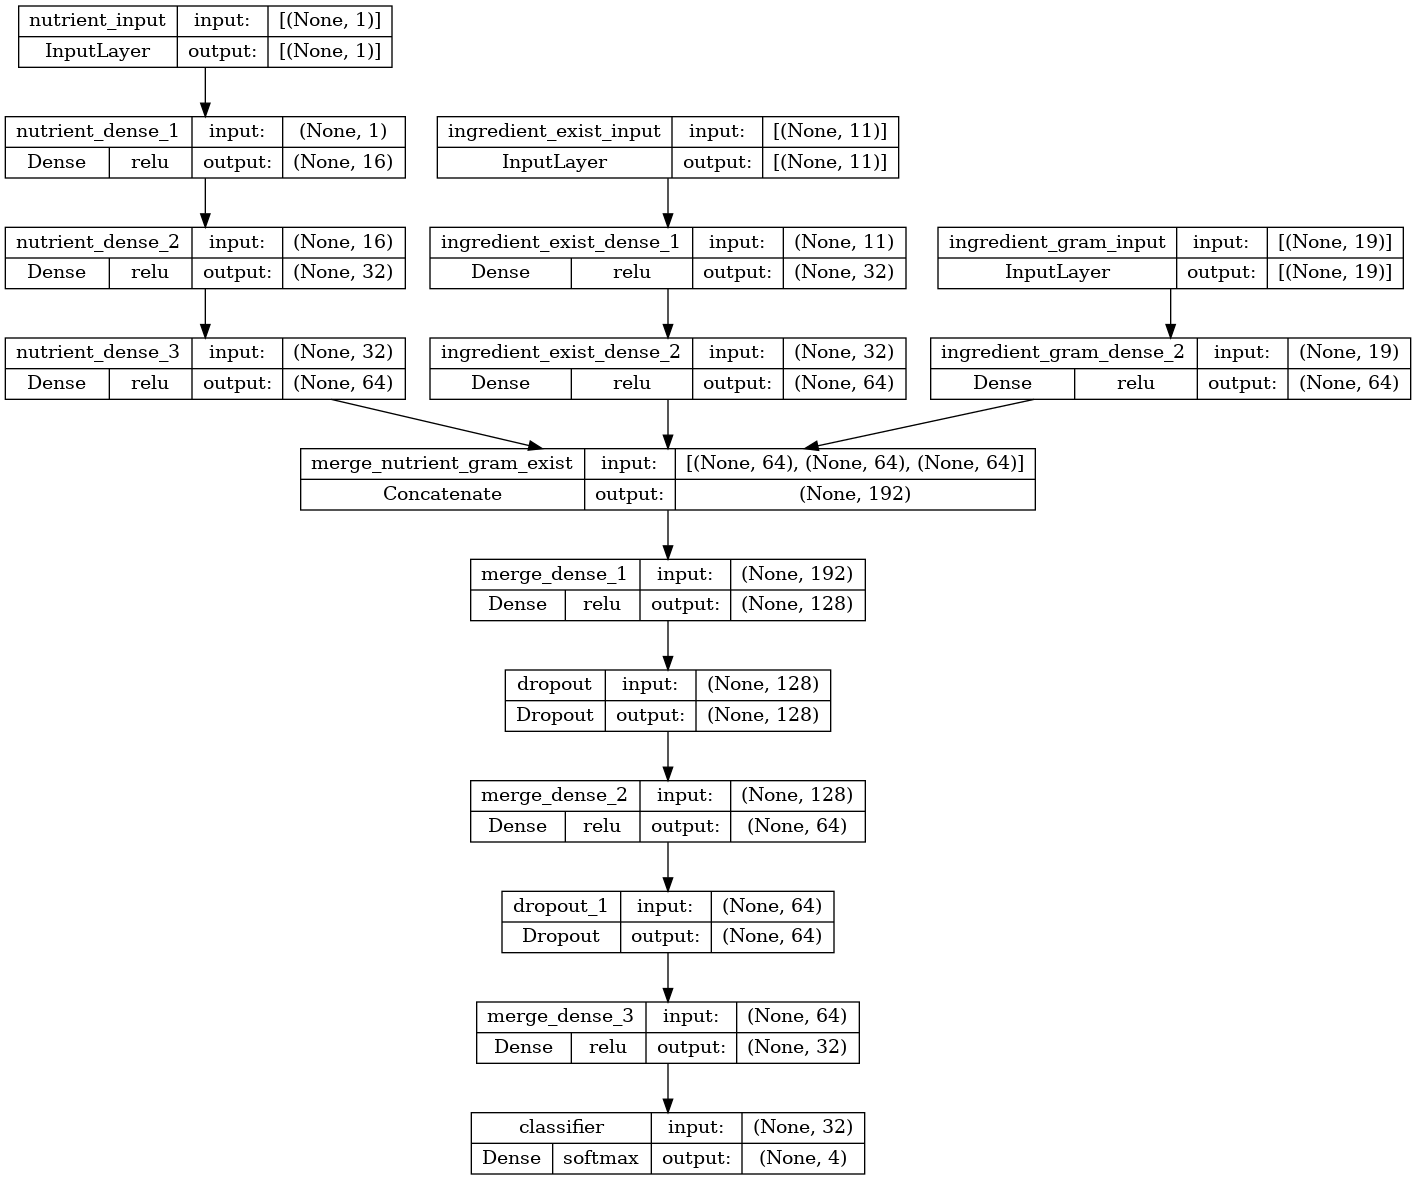

In [17]:
nutrients_input = Input(shape=(1, ), name="nutrient_input")
nutrients_dense1 = Dense(16, activation=relu, name = "nutrient_dense_1")(nutrients_input)
nutrients_dense2 = Dense(32, activation=relu, name = "nutrient_dense_2")(nutrients_dense1)
nutrients_dense3 = Dense(64, activation=relu, name = "nutrient_dense_3")(nutrients_dense2)

ingredient_exist_input = Input(shape=(11, ), name = "ingredient_exist_input")
ingredient_exist_dense1 = Dense(32, activation=relu, name = "ingredient_exist_dense_1")(ingredient_exist_input)
ingredient_exist_dense2 = Dense(64, activation=relu, name = "ingredient_exist_dense_2")(ingredient_exist_dense1)

ingredient_gram_input = Input(shape=(19, ), name="ingredient_gram_input")
ingredient_gram_dense1 = Dense(32, activation=relu, name="ingredient_gram_dense_1")(ingredient_gram_input)
ingredient_gram_dense2 = Dense(64, activation=relu, name="ingredient_gram_dense_2")(ingredient_gram_input)

merge = concatenate([nutrients_dense3, ingredient_exist_dense2, ingredient_gram_dense2], name="merge_nutrient_gram_exist")
merge_dense1 = Dense(128, activation=relu, name = "merge_dense_1")(merge)
merge_dropout1 = Dropout(0.5)(merge_dense1)
merge_dense2 = Dense(64, activation=relu, name = "merge_dense_2")(merge_dropout1)
merge_dropout2 = Dropout(0.5)(merge_dense2) 
merge_dense3 = Dense(32, activation=relu, name = "merge_dense_3")(merge_dropout2)
output = Dense(4, activation=softmax, name="classifier")(merge_dense3)

model = Model(inputs = [nutrients_input, ingredient_exist_input, ingredient_gram_input], outputs = output)
model.compile(optimizer=Adam(learning_rate=0.001), loss=sparse_categorical_crossentropy, metrics=[sparse_categorical_accuracy])

model.summary()
plot_model(model, show_layer_activations=True, show_shapes=True)

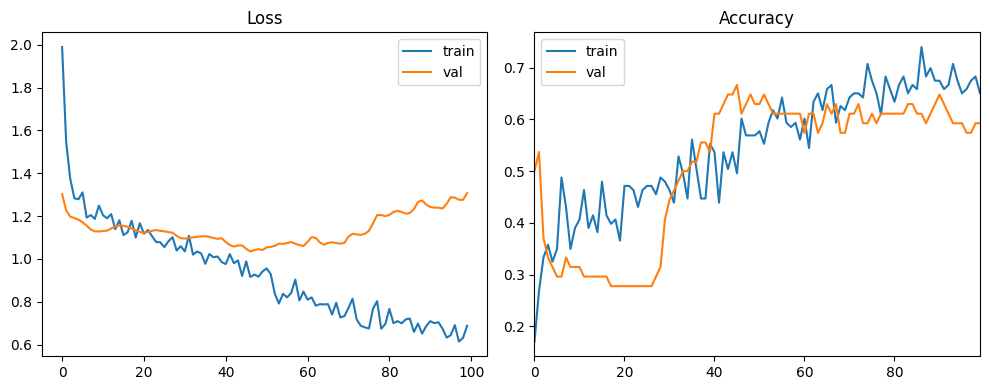

In [18]:
history = model.fit(train_input, train_target, validation_split=0.3, epochs=100, verbose=0)
showHistory(history)

In [19]:
from sklearn.metrics import confusion_matrix

prediction = model.predict(test_input)
prediction = np.argmax(prediction,axis=1)
confusion = confusion_matrix(test_target,prediction)
confusion

2/2 [==============================] - 0s 2ms/step


array([[ 5,  1,  2,  0],
       [ 2, 16,  6,  1],
       [ 2,  7, 12,  1],
       [ 0,  0,  1,  3]])

In [20]:
prediction

array([2, 0, 2, 1, 2, 1, 2, 1, 3, 1, 0, 3, 3, 1, 2, 1, 1, 3, 2, 0, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 3,
       1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1])

In [21]:
test_target

array([2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 0, 3, 1, 2, 0, 1, 1, 3, 0, 1, 1, 1,
       1, 2, 3, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2])